MANMEET SINGH REKHI
101903173

In [1]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [60]:
df = pd.read_excel('DATASET.xlsx')
df.head(10)

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,NaN,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,NaN,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,NaN,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,NaN,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,NaN,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


In [61]:
df.year.value_counts()

1     101
2     101
3     101
4     101
5     101
6     101
7     101
8     101
9     101
10    100
Name: year, dtype: int64

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
ind = 910
l = []
for i in range(9):
  l.append(ind+i)
l

[910, 911, 912, 913, 914, 915, 916, 917, 918]

In [64]:
df.fillna(0, inplace=True)
df.drop(l, inplace = True)

In [65]:
mul = 10
j = 0
for i in range(100):
  sec_name = df.iloc[j,0]
  df.iloc[j:j + mul, 0] = sec_name
  j += mul
df_test = df.loc[df['year'] == 10]
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [66]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Section_name')
df.head(20)

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.810
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.860
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.890
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.920
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960


In [14]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=19)

In [47]:
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [67]:
# Extract the training part of input dataset
move = 9
def extract_xtrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, 1:10]

# Extract the training part of output dataset
def extract_ytrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, col_start]

# Extract the testing part of input dataset
def extract_xtest(df, row_start):
  row_end = row_start + move
  return df.iloc[row_end, 1:10].to_numpy()

# Extract the output part of ouput dataset
def extract_ytest(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_end, col_start]

# function to calcuate mean square error
def calcuate_lmse(predict_val, test_val):
  pred_diff = predict_val - test_val
  return (pred_diff)**2

In [68]:
# Get the XY Split
column_name = ["Para-"+str(i) for i in range(9,14)]
XY = []
def getXYsplit(df, row_start, row_end):
  XY = []
  XY.append(extract_xtrain(df, row_start, row_end))
  XY.append(extract_ytrain(df, row_start, row_end))
  XY.append(extract_xtest(df,row_start))
  XY.append(extract_ytest(df,row_start,row_end))
  return XY

In [69]:
from collections import defaultdict

# Create a dictionary for storing predicted and true values
pred_values = defaultdict(lambda : [])

In [70]:
from sklearn.metrics import mean_squared_error
model = GradientBoostingRegressor()
target_col = [10,11,12,13,14]
root_mean_square_error = []
total_count = 0
curr_section = 0
total_squared_error = 0
max_val = 1000
for j in target_col:
  local_squared_error = 0
  l_count = 0
  LXY = [0,0,0,0]
  for i in range(0, max_val, 10):
    LXY = getXYsplit(df,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]

    # fit the model and predict
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]

    # store the predicted values
    pred_values[column_name[curr_section]].append(ypred)
    
    # store squared difference for RMSE

    # local_squared_error = calcuate_lmse(ypred, y_test) + local_squared_error
    total_squared_error = calcuate_lmse(ypred, y_test) + total_squared_error
    l_count += 1
    total_count += 1

  # root_mean_square_error.append(local_squared_error)
  curr_section += 1
predicted_df = pd.DataFrame.from_dict(pred_values)

# Calculate  RMSE
total_rmse_by_n = total_squared_error/total_count
final_rmse = total_rmse_by_n**0.5

print("The RMSE is " + str(final_rmse))

The RMSE is 38.077878057313136


In [50]:
model = BayesianRidge()
from sklearn.metrics import mean_squared_error
target_col = [10,11,12,13,14]
root_mean_square_error = []
total_count = 0
curr_section = 0
total_squared_error = 0
max_val = 1000
for j in target_col:
  local_squared_error = 0
  l_count = 0
  LXY = [0,0,0,0]
  for i in range(0, max_val, 10):
    LXY = getXYsplit(df,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]

    # fit the model and predict
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]

    # store the predicted values
    pred_values[column_name[curr_section]].append(ypred)
    
    # store squared difference for RMSE

    # local_squared_error = calcuate_lmse(ypred, y_test) + local_squared_error
    total_squared_error = calcuate_lmse(ypred, y_test) + total_squared_error
    l_count += 1
    total_count += 1

  # root_mean_square_error.append(local_squared_error)
  curr_section += 1
predicted_df = pd.DataFrame.from_dict(pred_values)

# Calculate  RMSE
total_rmse_by_n = total_squared_error/total_count
final_rmse = total_rmse_by_n**0.5

print("The RMSE is " + str(final_rmse))

The RMSE is 77.04498657347882


In [51]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge()
from sklearn.metrics import mean_squared_error
target_col = [10,11,12,13,14]
root_mean_square_error = []
total_count = 0
curr_section = 0
total_squared_error = 0
max_val = 1000
for j in target_col:
  local_squared_error = 0
  l_count = 0
  LXY = [0,0,0,0]
  for i in range(0, max_val, 10):
    LXY = getXYsplit(df,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]

    # fit the model and predict
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]

    # store the predicted values
    pred_values[column_name[curr_section]].append(ypred)
    
    # store squared difference for RMSE

    # local_squared_error = calcuate_lmse(ypred, y_test) + local_squared_error
    total_squared_error = calcuate_lmse(ypred, y_test) + total_squared_error
    l_count += 1
    total_count += 1

  # root_mean_square_error.append(local_squared_error)
  curr_section += 1
predicted_df = pd.DataFrame.from_dict(pred_values)

# Calculate  RMSE
total_rmse_by_n = total_squared_error/total_count
final_rmse = total_rmse_by_n**0.5

print("The RMSE is " + str(final_rmse))

The RMSE is 106.8198639364674


In [55]:
from sklearn.svm import SVR
model = SVR()
from sklearn.metrics import mean_squared_error
target_col = [10,11,12,13,14]
root_mean_square_error = []
total_count = 0
curr_section = 0
total_squared_error = 0
max_val = 1000
for j in target_col:
  local_squared_error = 0
  l_count = 0
  LXY = [0,0,0,0]
  for i in range(0, max_val, 10):
    LXY = getXYsplit(df,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]

    # fit the model and predict
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]

    # store the predicted values
    pred_values[column_name[curr_section]].append(ypred)
    
    # store squared difference for RMSE

    # local_squared_error = calcuate_lmse(ypred, y_test) + local_squared_error
    total_squared_error = calcuate_lmse(ypred, y_test) + total_squared_error
    l_count += 1
    total_count += 1

  # root_mean_square_error.append(local_squared_error)
  curr_section += 1
predicted_df = pd.DataFrame.from_dict(pred_values)

# Calculate  RMSE
total_rmse_by_n = total_squared_error/total_count
final_rmse = total_rmse_by_n**0.5

print("The RMSE is " + str(final_rmse))

The RMSE is 75.34074307174144


In [71]:
plot_row = 50
random_rows = []
for i in range(plot_row):
  random_rows.append(random.randint(0,90))

PARA-9

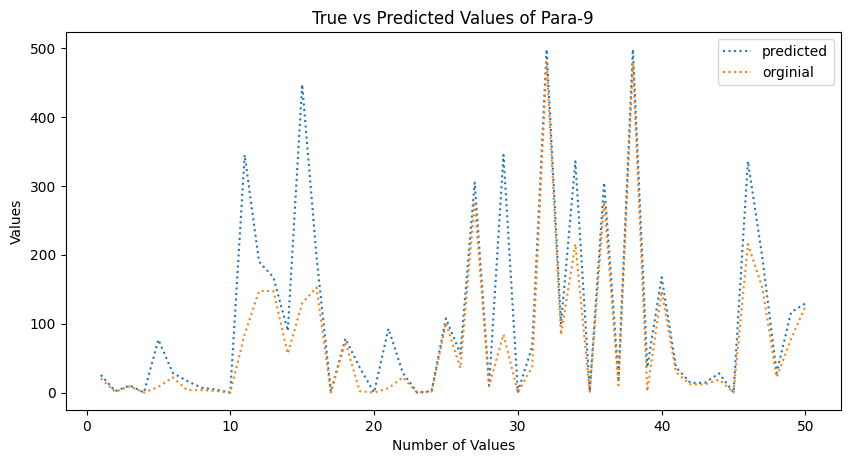

In [73]:
figure(figsize=(10, 5), dpi=100)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,10]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')

PARA-10

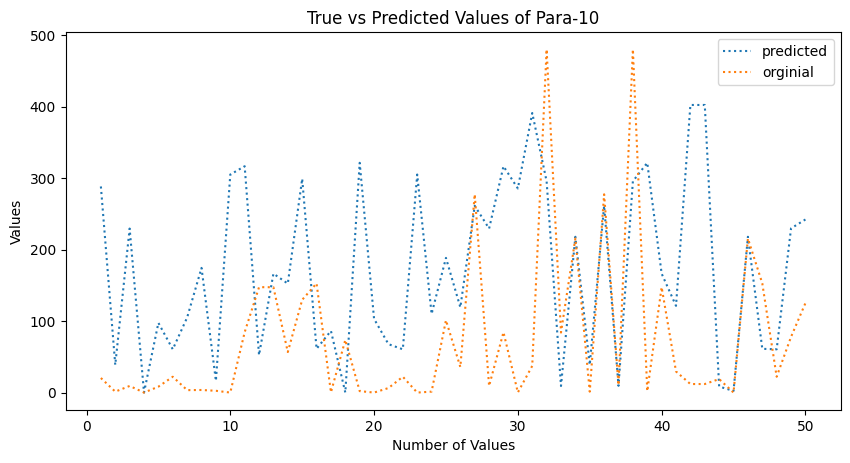

In [77]:
figure(figsize=(10, 5), dpi=100)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,11]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')

PARA-11

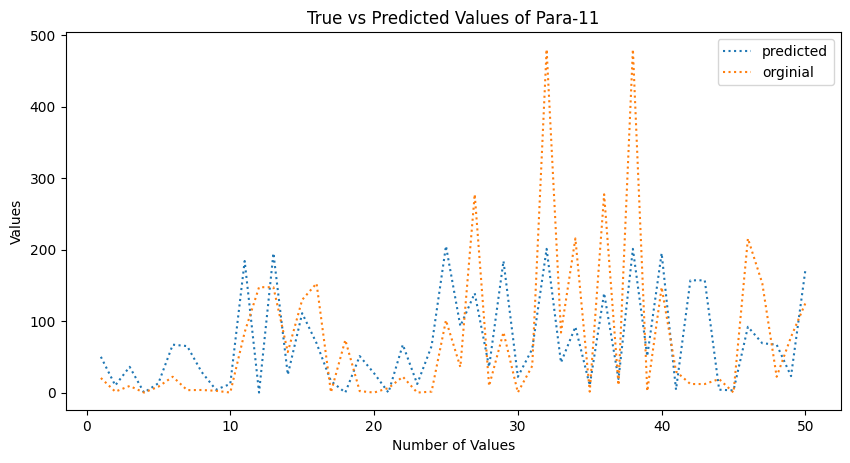

In [78]:
figure(figsize=(10, 5), dpi=100)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,12]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')

PARA-12

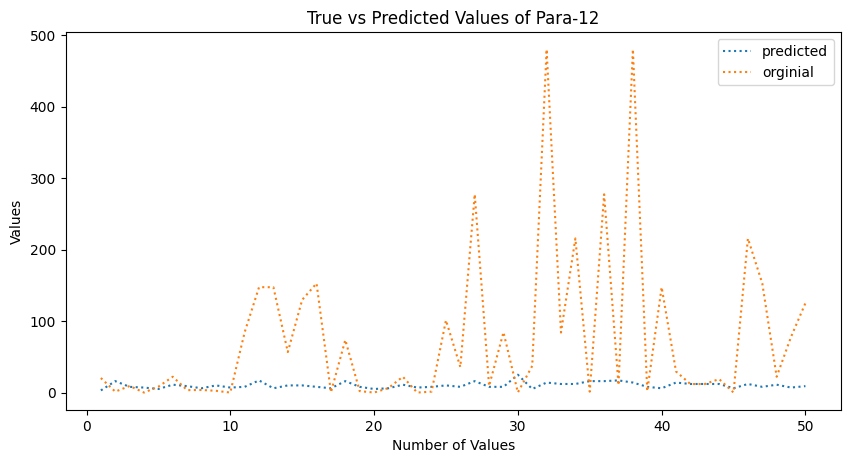

In [80]:
figure(figsize=(10, 5), dpi=100)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,13]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')

PARA-13

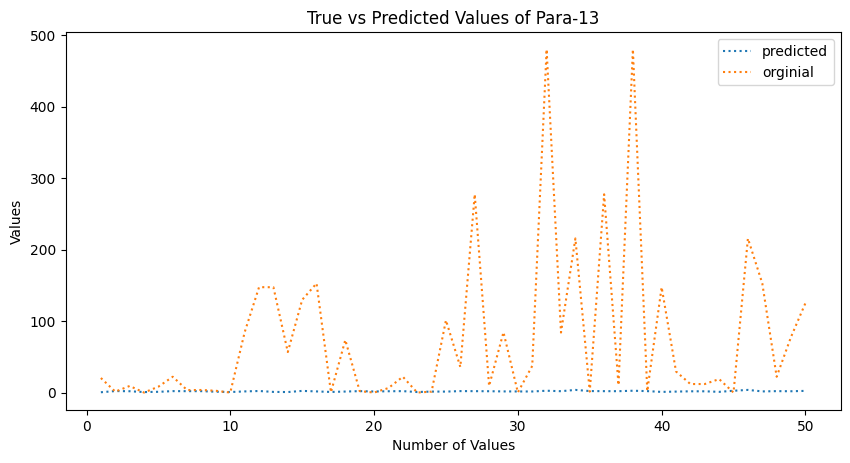

In [81]:
figure(figsize=(10, 5), dpi=100)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,14]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')